CASE STUDY 2 ( LOAN LENDING ANALYSIS )

1. DATA UNDERSTANDING

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import as sns
loan = pd.read_csv(r"C:\Users\LENOVO\Desktop\SEM-4\MLP Lab\CASE STUDY 6 7\case.csv",sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#viewing the first 5 rows of the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

2. DATA CLEANING

In [4]:
#finding out the percentage of missing values in each column
#to remove columns having maximum null values
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


We can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [5]:
#removing the columns having more than 10% missing values
loan = loan.drop(loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 10], axis=1)

In [6]:
#finding the number of rows and columns
loan.shape

(39717, 53)

In [7]:
#finding out the percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [8]:
#viewing datatypes of columns and number of not null values in each columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [9]:
#viewing datatypes of each columns
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [10]:
# The column int_rate is character type, let's convert it to float and also revove % sign
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [11]:
#viewing datatypes of each columns
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [12]:
#also, lets extract the numeric part from the variable employment length
#first, let's drop the missing values from the column 
loan = loan[~loan['emp_length'].isnull()]
#using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
#convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [13]:
#viewing datatypes of each columns
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

3. DATA ANALYSIS

Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.

Now, there are broadly 3 types of variables -

1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

In [14]:
#listing out customer behaviour variables are not available at the time of loan application
#to drop the columns not necessary in the analysis
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [15]:
#removing the behaviour variables from analysis
new = loan.drop(behaviour_var, axis=1)

In [16]:
#looking at all the column names
new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [17]:
#finding the number of rows and columns
new.shape

(38642, 32)

In [18]:
#getting rid of other variables that aren't that useful for our analysis
new = new.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [19]:
#finding the number of rows and columns
new.shape

(38642, 28)

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [20]:
new['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1

In [21]:
new = new[new['loan_status'] != 'Current']

In [22]:
#filtering only fully paid or charged-off
new['loan_status'] = new['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
#converting loan_status to integer type
new['loan_status'] = new['loan_status'].apply(lambda x: pd.to_numeric(x))
#counting the number of charged off and fully paid

new['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [23]:
#default rate
t = sum(map(lambda x: x!=2,new['loan_status']))
d = sum(map(lambda x: x==1,new['loan_status']))
round((d/t)*100)

14

In [24]:
#removing the fully paid as we are only concerned about the defaulters
new = new[new['loan_status'] != 0]

In [25]:
#finding the number of rows and columns
new.shape

(5399, 28)

4. UNIVARIATE(SINGLE VARIABLE) ANALYSIS

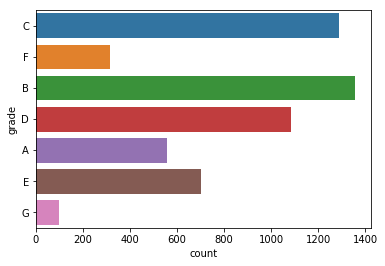

In [26]:
#compare default rates across grade of loan
sns.countplot(y='grade', data=new)
plt.show()

In [27]:
#counting of default rates across grade of loan
new['grade'].value_counts()

B    1355
C    1288
D    1085
E     700
A     558
F     313
G     100
Name: grade, dtype: int64

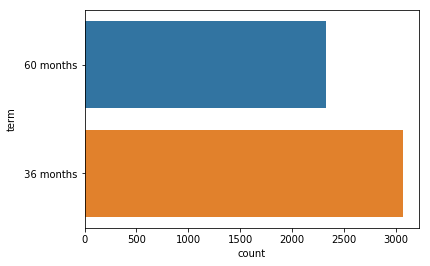

In [28]:
#term: 36 months loans default more than 60 months loans
sns.countplot(y='term', data=new)
plt.show()

In [29]:
#counting default rates across term of loan
new['term'].value_counts()

 36 months    3073
 60 months    2326
Name: term, dtype: int64

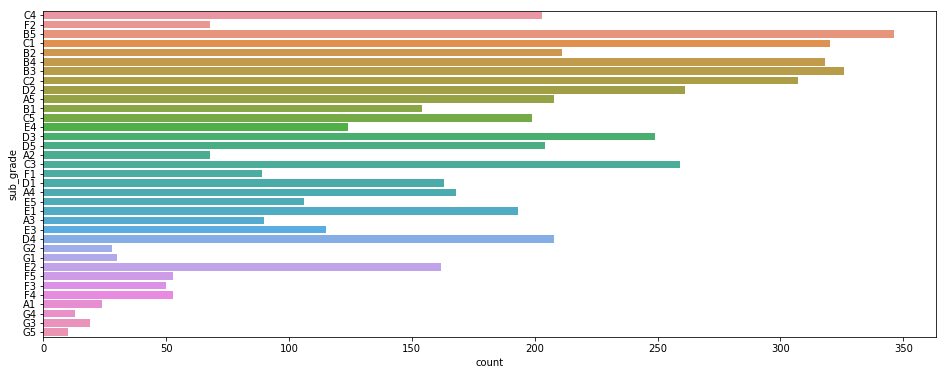

In [30]:
#compare default rates across sub grade of loan, b5 having highest defaulters
plt.figure(figsize=(16, 6))
sns.countplot(y='sub_grade', data=new)
plt.show()

In [31]:
#counting default rates across sub grade of loan
new['sub_grade'].value_counts()

B5    346
B3    326
C1    320
B4    318
C2    307
D2    261
C3    259
D3    249
B2    211
A5    208
D4    208
D5    204
C4    203
C5    199
E1    193
A4    168
D1    163
E2    162
B1    154
E4    124
E3    115
E5    106
A3     90
F1     89
A2     68
F2     68
F5     53
F4     53
F3     50
G1     30
G2     28
A1     24
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64

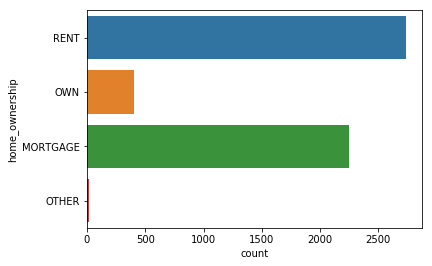

In [32]:
#home ownership: rented home owner are the max defaulters
sns.countplot(y='home_ownership', data=new)
plt.show()

In [33]:
#counting default rates across home ownership of loan
new['home_ownership'].value_counts()

RENT        2736
MORTGAGE    2245
OWN          400
OTHER         18
Name: home_ownership, dtype: int64

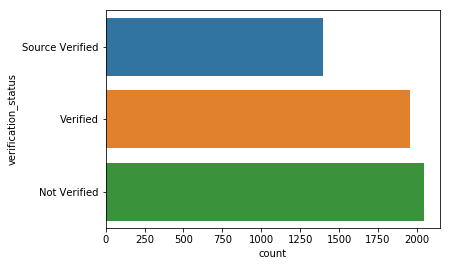

In [34]:
#verification_status: surprisingly, verified loans default more than not verified
sns.countplot(y='verification_status', data=new)
plt.show()

In [35]:
#counting default rates across verification status of loan
new['verification_status'].value_counts()

Not Verified       2049
Verified           1954
Source Verified    1396
Name: verification_status, dtype: int64

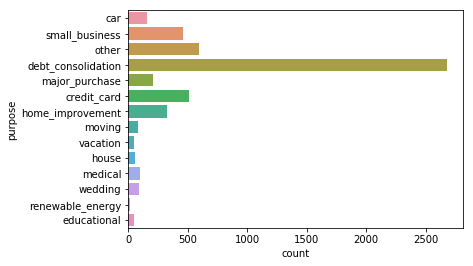

In [36]:
#purpose: debt consolidation default most
sns.countplot(y='purpose', data=new)
plt.show()

In [37]:
#counting default rates across purpose of loan
new['purpose'].value_counts()

debt_consolidation    2679
other                  596
credit_card            510
small_business         462
home_improvement       330
major_purchase         211
car                    155
medical                101
wedding                 92
moving                  84
house                   59
educational             52
vacation                50
renewable_energy        18
Name: purpose, dtype: int64

In [38]:
# extracting month and year from issue_date
#to analyze which month has max defaulters
from datetime import datetime
new['issue_d'] = new['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
new['month'] = new['issue_d'].apply(lambda x: x.month)
new['year'] = new['issue_d'].apply(lambda x: x.year)

In [39]:
#finding the number of rows and columns
new.shape

(5399, 30)

In [40]:
#counting default rates across months of loan
new.groupby('year').year.count()

year
2007      45
2008     247
2009     594
2010    1411
2011    3102
Name: year, dtype: int64

In [41]:
#counting default rates across year of loan
new.groupby('month').month.count()

month
1     310
2     266
3     339
4     356
5     444
6     460
7     462
8     455
9     527
10    554
11    570
12    656
Name: month, dtype: int64

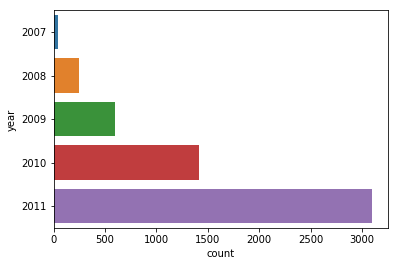

In [42]:
#year: 2011 has max defaulters
sns.countplot(y='year', data=new)
plt.show()

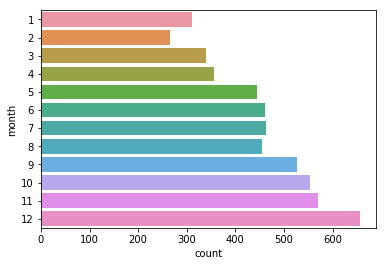

In [43]:
#month: December has maximum defaulters
sns.countplot(y='month', data=new)
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


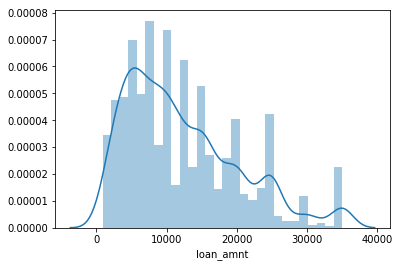

In [44]:
#loan amount: the median loan amount is around 10,000
sns.distplot(new['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [45]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
new['loan_amnt'] = new['loan_amnt'].apply(lambda x: loan_amount(x))

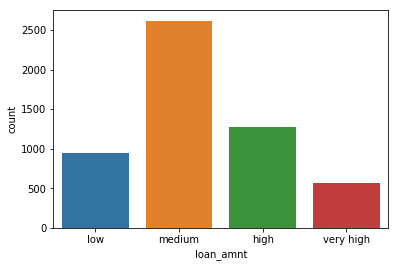

In [46]:
#loan amount: amount 5000 - 15000 has max defaulters
sns.countplot(x='loan_amnt',data=new)
plt.show()

In [47]:
new['funded_amnt_inv'] = new['funded_amnt_inv'].apply(lambda x: loan_amount(x))

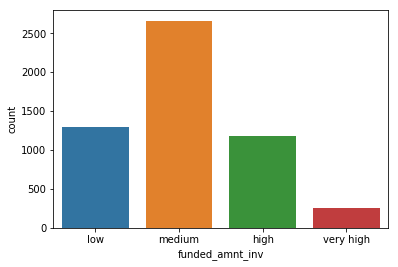

In [48]:
#funded amount inv: amount 5000 - 15000 has max defaulters
sns.countplot(x='funded_amnt_inv',data=new)
plt.show()

In [49]:
#lets also convert interest rate to low, medium, high
#binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
new['int_rate'] = new['int_rate'].apply(lambda x: int_rate(x))

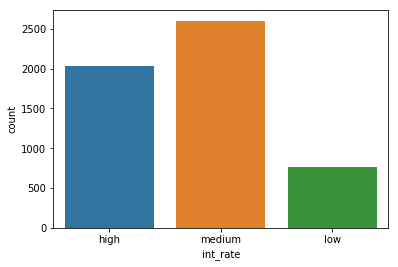

In [50]:
#comparing default rates across rates of interest
#high interest rates default more
sns.countplot(x='int_rate',data=new)
plt.show()

In [51]:
#debt to income ratio
def dti(n):
    if n <= 5:
        return 'low'
    elif n > 5 and n <=10:
        return 'medium'
    else:
        return 'high'
new['dti'] = new['dti'].apply(lambda x: dti(x))

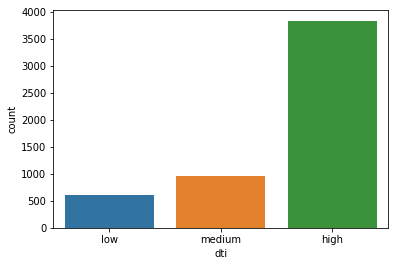

In [52]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates
sns.countplot(x='dti',data=new)
plt.show()

In [53]:
#funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
new['funded_amnt'] = new['funded_amnt'].apply(lambda x: funded_amount(x))

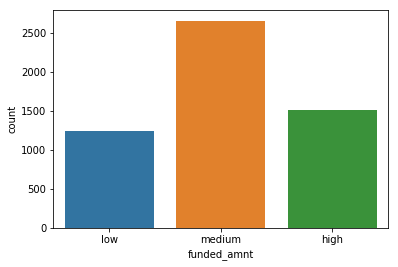

In [54]:
sns.countplot(x='funded_amnt',data=new)
plt.show()

In [55]:
#installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
new['installment'] = new['installment'].apply(lambda x: installment(x))

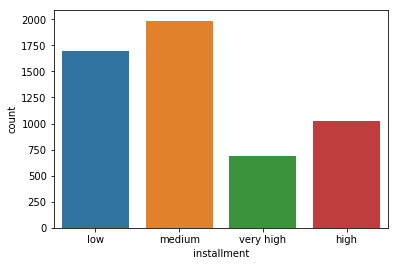

In [56]:
# comparing default rates across installment
sns.countplot(x='installment',data=new)
plt.show()

In [57]:
#annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
new['annual_inc'] = new['annual_inc'].apply(lambda x: annual_income(x))

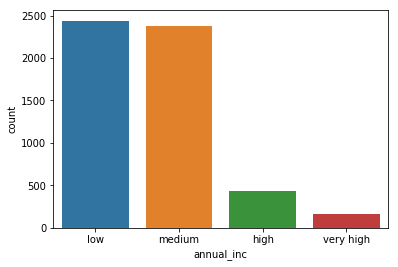

In [58]:
# annual income and default rate
# lower the annual income, higher the default rate
sns.countplot(x='annual_inc',data=new)
plt.show()

In [59]:
# employment length
# first, let's drop the missing value observations in emp length
new = new[~new['emp_length'].isnull()]
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'
new['emp_length'] = new['emp_length'].apply(lambda x: emp_length(x))

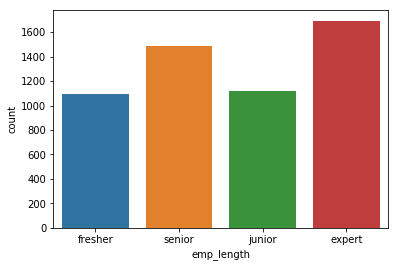

In [60]:
# not much of a predictor of default
sns.countplot(x='emp_length',data=new)
plt.show()

5. BIVARIATE (TWO VARIABLES) ANALYSIS

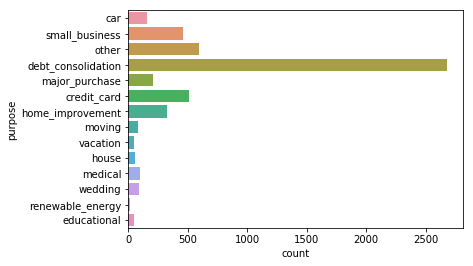

In [61]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
sns.countplot(y='purpose', data=new)
plt.show()

In [62]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","small_business"]
new = new[new['purpose'].isin(main_purposes)]
new['purpose'].value_counts()

debt_consolidation    2679
credit_card            510
small_business         462
home_improvement       330
Name: purpose, dtype: int64

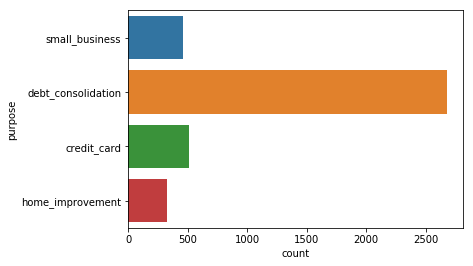

In [63]:
# plotting number of loans by purpose 
sns.countplot(y='purpose', data=new)
plt.show()

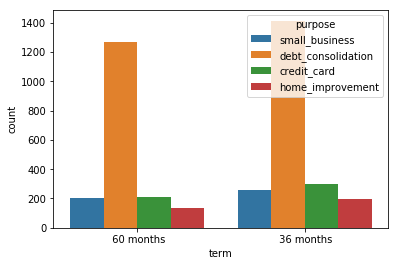

In [64]:
#term
sns.countplot(x='term', hue='purpose', data=new)
plt.show()

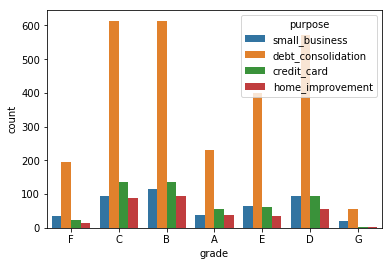

In [65]:
#grade
sns.countplot(x='grade', hue='purpose', data=new)
plt.show()

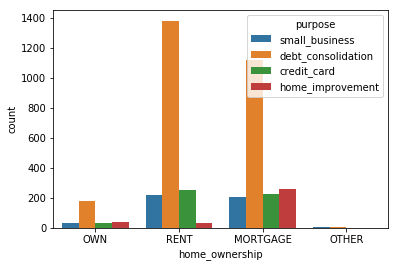

In [66]:
#home ownership
sns.countplot(x='home_ownership', hue='purpose', data=new)
plt.show()

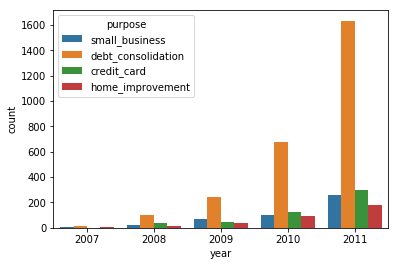

In [67]:
#year
sns.countplot(x='year', hue='purpose', data=new)
plt.show()

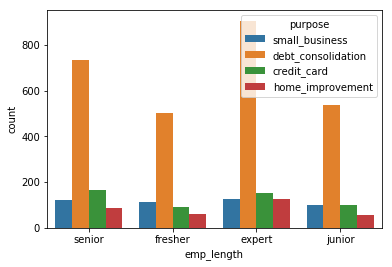

In [68]:
#emp length
sns.countplot(x='emp_length', hue='purpose', data=new)
plt.show()

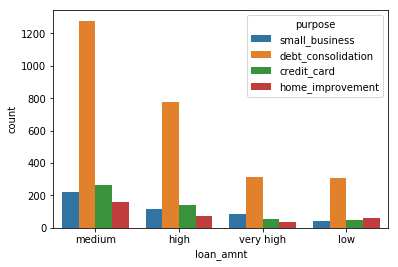

In [69]:
#loan amnt
sns.countplot(x='loan_amnt', hue='purpose', data=new)
plt.show()

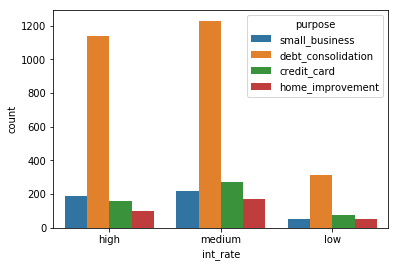

In [70]:
#interest rate
sns.countplot(x='int_rate', hue='purpose', data=new)
plt.show()

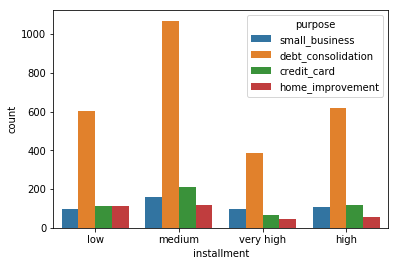

In [71]:
#installment
sns.countplot(x='installment', hue='purpose', data=new)
plt.show()

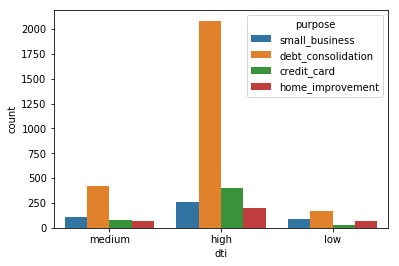

In [72]:
#dept income ratio
sns.countplot(x='dti', hue='purpose', data=new)
plt.show()

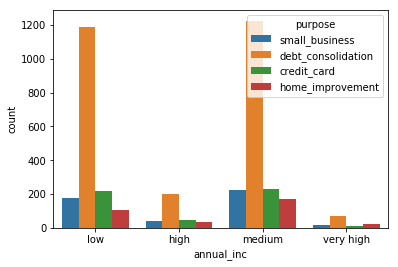

In [73]:
#annual income
sns.countplot(x='annual_inc', hue='purpose', data=new)
plt.show()